In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython import display
from ipywidgets import IntProgress

from code.mcmc import *
from code.lattice import *

%load_ext autoreload
%autoreload 2

# Inference: Gibbs Sampling

In [2]:
fprefix = 'mcmc_gaussian'

h, w = 500, 500

J = 0.5
B = 0.01 * gaussian_B(h, w)
beta = 10

n_steps = 500

In [3]:
lattice = create_spin_lattice(h, w).astype('int8')

timesteps = [lattice.copy()]
magnetizations = [magnetization(lattice)]
energies = [energy(lattice, J, B)]

f = IntProgress(min=0, max=n_steps)
display.display(f)
for i in range(n_steps):
    step_all(lattice, J, B, beta)
    
    timesteps.append(lattice.copy())
    magnetizations.append(magnetization(lattice))
    energies.append(energy(lattice, J, B))
    
    f.value += 1

IntProgress(value=0, max=500)

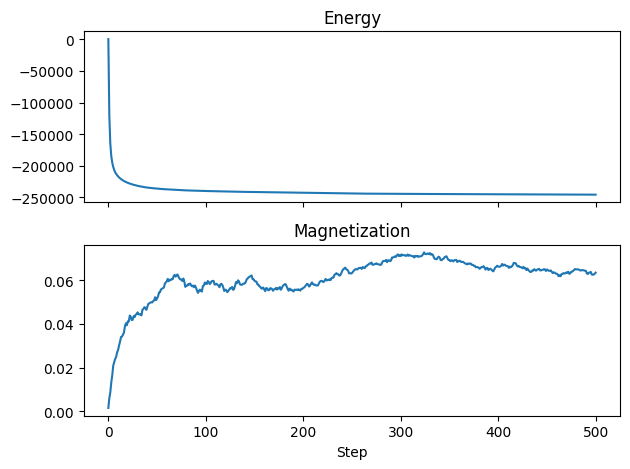

In [4]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)
ax0.set_title(f'Energy')
ax1.set_title(f'Magnetization')

ax0.plot(energies)
ax1.plot(magnetizations)

plt.xlabel('Step')
plt.tight_layout()

plt.savefig('graphics/' + fprefix + '_energy.png')

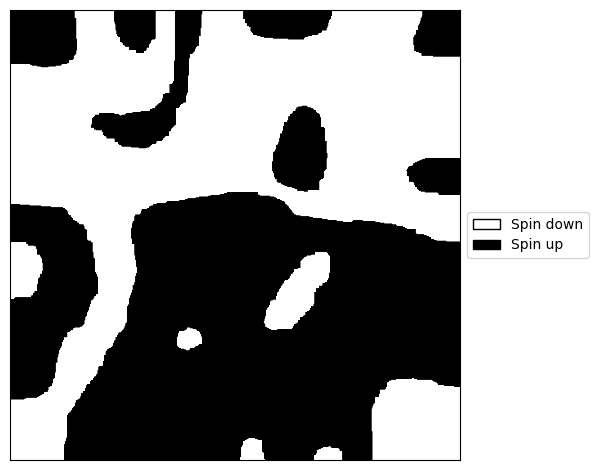

In [5]:
render_timesteps(timesteps, 32, 8, 'graphics/' + fprefix + '.mp4')